In [14]:
# Three main sections:
# train_df, test_df = train_test_split(df, test_size_proportion=0.34)
# tree = decision_tree_algorithm(train_df)
# accuracy = calculate_accuracy(test_df, tree)

## Imports

In [145]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from pprint import pprint

## Load and Prepare Data

In [146]:
df = pd.read_csv("Data\\breast_cancer_wisconsin_data.csv")
df = df.drop("id", 1)
df = df.drop("Unnamed: 32",1)

In [147]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

## Train-Test-Split

In [149]:
def train_test_split(df, test_size):
    if isinstance(test_size, float):
        test_size = round (test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [150]:
random.seed(0)
train_df, test_df = train_test_split(df,test_size=0.34)

## Helper Function - 1

In [151]:
data = train_df.values
data[:2]

array([['M', 17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471,
        0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904,
        0.05372999999999999, 0.01587, 0.03003, 0.006193, 25.38, 17.33,
        184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189],
       ['M', 19.69, 21.25, 130.0, 1203.0, 0.1096, 0.1599, 0.1974, 0.1279,
        0.2069, 0.059989999999999995, 0.7456, 0.7869, 4.585, 94.03,
        0.00615, 0.040060000000000005, 0.03832, 0.02058, 0.0225,
        0.004571, 23.57, 25.53, 152.5, 1709.0, 0.1444, 0.4245, 0.4504,
        0.243, 0.3613, 0.08757999999999999]], dtype=object)

In [152]:
def check_purity(data):
    label_column = data[:, 0]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [153]:
check_purity(train_df[train_df.radius_mean < 11.08].values)

True

In [154]:
## So all the data where radius_mean < 11.08 is belong to Class "B",  benign cases 

def classify_data(data):
    label_column = data[:, 0]
    unique_classes, count_unique_classes = np.unique(label_column, return_counts=True)

    index = count_unique_classes.argmax()
    classification = unique_classes[index] 
    
    return classification

In [155]:
classify_data(train_df[(train_df.radius_mean > 11.08) & (train_df.radius_mean < 11.48)].values)

'B'

In [157]:
train_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [168]:
# Potential Splits
def get_potential_splits(data):
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(1, n_columns):         
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
        
    return potential_splits

In [172]:
potential_splits = get_potential_splits(train_df.values)            

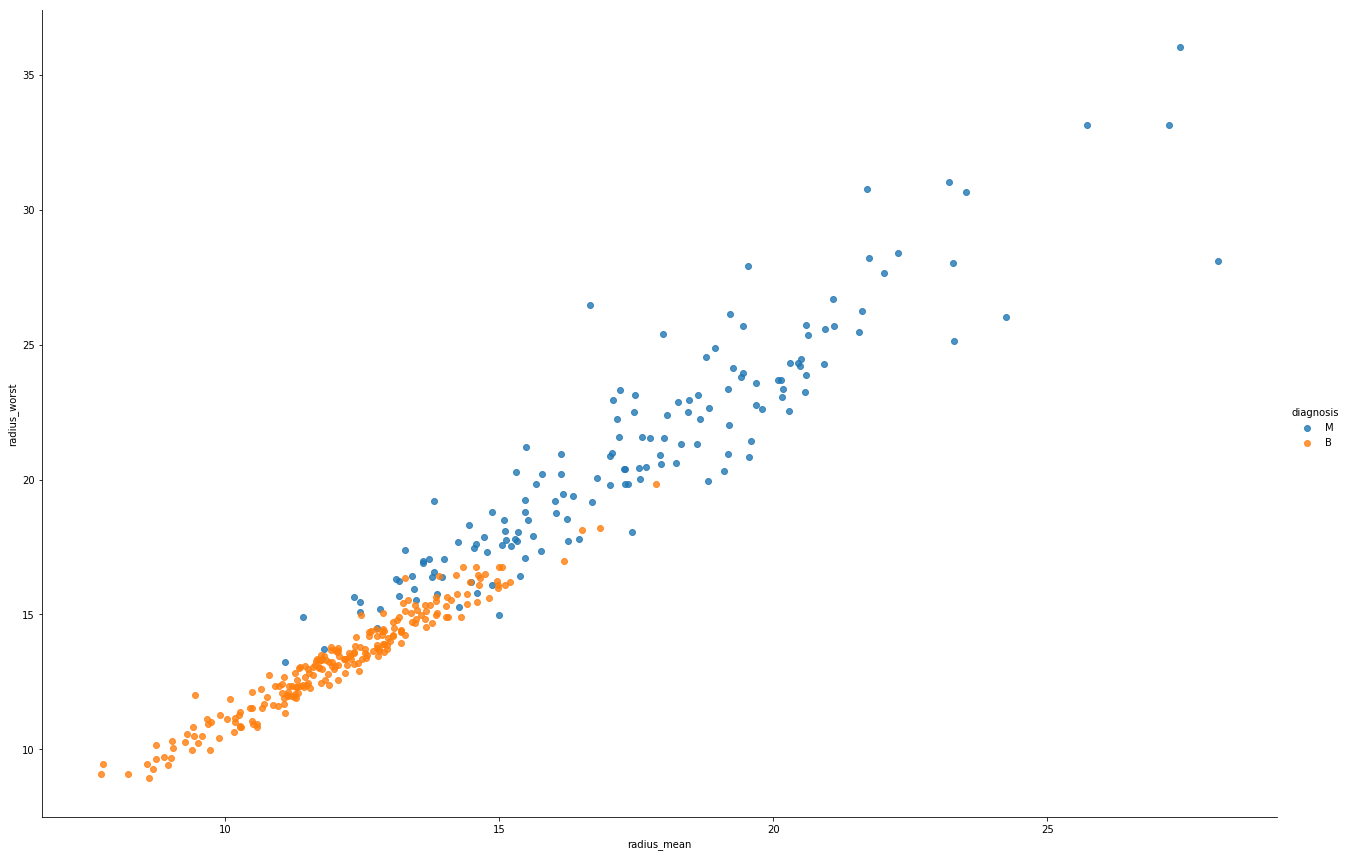

In [209]:
sns.lmplot(data=train_df, x='radius_mean', y='radius_worst', hue="diagnosis", fit_reg=False, height=12, aspect=1.5)
#plt.vlines(x=potential_splits[0])